In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 4.4 MB/s eta 0:00:00


✅ KNN Regression: MAE = 864.9593, R² = 0.5712
✅ Decision Tree: MAE = 563.8940, R² = 0.8199
✅ Random Forest: MAE = 546.9973, R² = 0.8580
✅ Gradient Boosting: MAE = 558.4445, R² = 0.8358
✅ Extra Trees: MAE = 608.3543, R² = 0.7759
✅ XGBoost: MAE = 354.1925, R² = 0.9426
               Model         MAE        R²
5            XGBoost  354.192520  0.942638
2      Random Forest  546.997267  0.857981
3  Gradient Boosting  558.444501  0.835819
1      Decision Tree  563.894048  0.819897
4        Extra Trees  608.354298  0.775854
0     KNN Regression  864.959286  0.571198


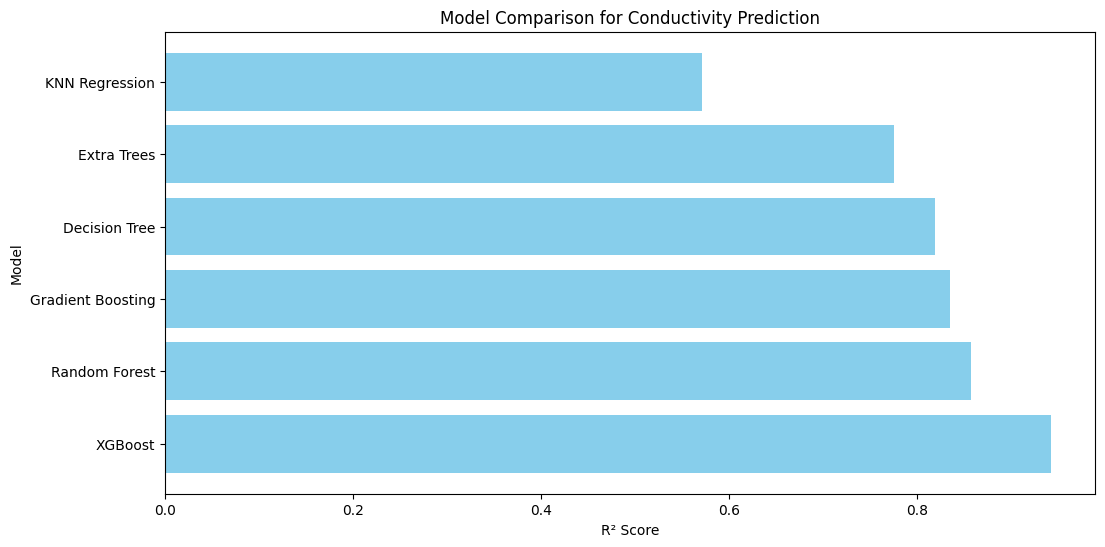

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
file_path = "/content/CONDUCTIVITY.csv"
df = pd.read_csv(file_path)

# Define input features and target
X = df.drop(columns=["conductivity"])  # Drop target variable
y = df["conductivity"]  # Target variable

# Check for missing values
if X.isnull().sum().any() or y.isnull().sum() > 0:
    print("Warning: Missing values detected. Consider handling them before training.")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {

    "KNN Regression": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror'),
}

# Store results
results = []

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((name, mae, r2))
    print(f"✅ {name}: MAE = {mae:.4f}, R² = {r2:.4f}")

# Convert results to DataFrame and sort by performance
df_results = pd.DataFrame(results, columns=["Model", "MAE", "R²"]).sort_values(by="MAE")
print(df_results)

# Plot Results
plt.figure(figsize=(12, 6))
plt.barh(df_results["Model"], df_results["R²"], color="skyblue")
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.title("Model Comparison for Conductivity Prediction")
plt.show()


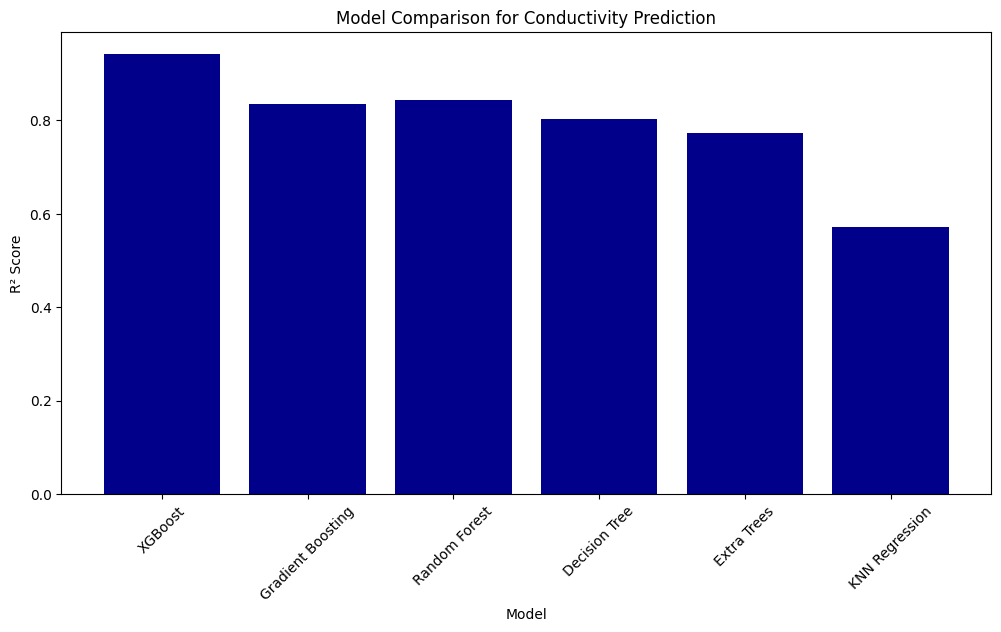

In [ ]:
# Plot Results
plt.figure(figsize=(12, 6))
plt.bar(df_results["Model"], df_results["R²"], color="darkblue")  # Use plt.bar() for vertical bars
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.title("Model Comparison for Conductivity Prediction")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

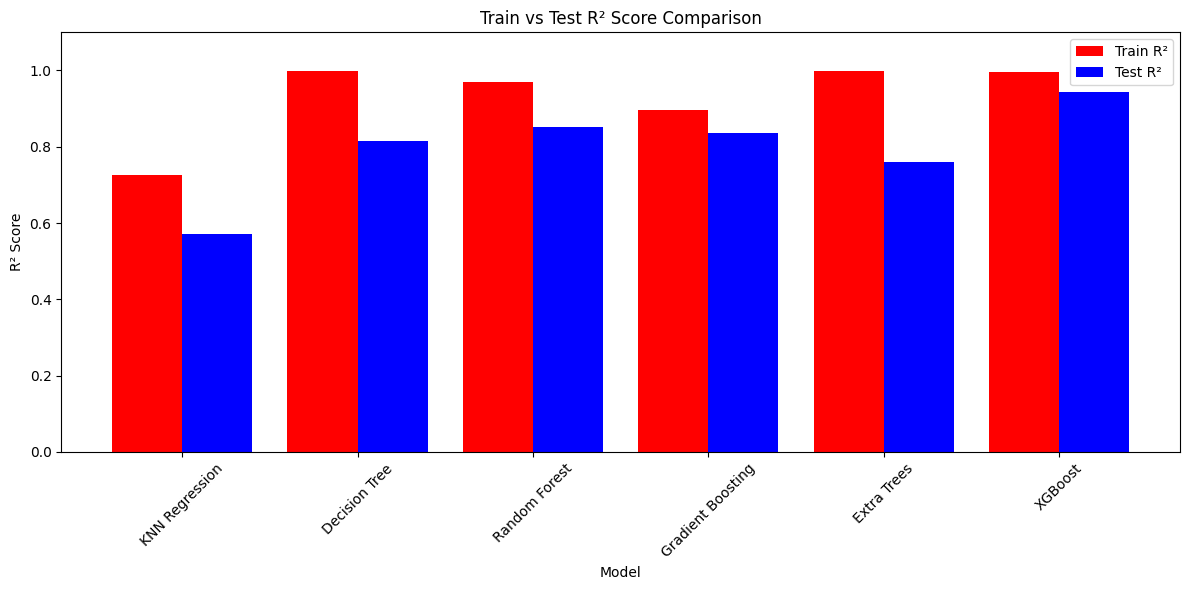

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Train and evaluate models separately for train and test R² scores
train_r2_scores = []
test_r2_scores = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

# Create a grouped bar chart
x = np.arange(len(models))
width = 0.4

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, train_r2_scores, width, label="Train R²", color="red")
plt.bar(x + width/2, test_r2_scores, width, label="Test R²", color="blue")

# Labels and Formatting
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.title("Train vs Test R² Score Comparison")
plt.xticks(x, models.keys(), rotation=45)
plt.legend()
plt.ylim(0, 1.1)  # Keep the scale from 0 to 1.1 for better visualization

# Show the plot
plt.tight_layout()
plt.show()

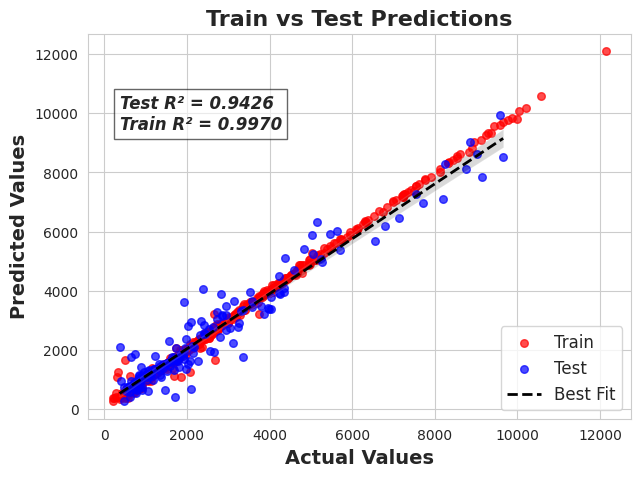

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Set Seaborn style
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(7, 5))

# Scatter plots for train and test data
plt.scatter(y_train, y_train_pred, color="red", label="Train", alpha=0.7, s=30)
plt.scatter(y_test, y_test_pred, color="blue", label="Test", alpha=0.7, s=30)

# Best-fit regression line
sns.regplot(x=y_test, y=y_test_pred, scatter=False, color="black", line_kws={"linestyle": "--", "linewidth": 2}, label="Best Fit")

# Labels and title
plt.xlabel("Actual Values", fontsize=14, fontweight='bold')
plt.ylabel("Predicted Values", fontsize=14, fontweight='bold')
plt.title("Train vs Test Predictions", fontsize=16, fontweight='bold')

# Compute R² Scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display R² values on the plot (formatted properly)
plt.text(min(y_test), max(y_test)*0.98, f"Test R² = {test_r2:.4f}\nTrain R² = {train_r2:.4f}",
         fontsize=12, fontweight="bold", ha="left", style="italic", bbox=dict(facecolor="white", alpha=0.6, edgecolor="black"))

# Improve legend
plt.legend(fontsize=12, loc="lower right")

# Show plot
plt.show()

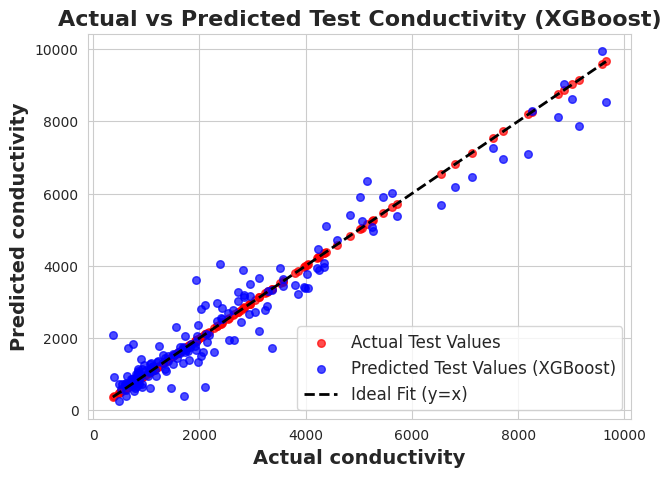

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("whitegrid")

# Assuming these are the test set predictions and actual values for Random Forest
y_test_best = y_test  # Actual test values

# Get predictions for Random Forest (Assuming 'models' is defined from previous code)
rf_model = models["XGBoost"]
y_test_pred_best = rf_model.predict(X_test)  # Predicted test values from the Random Forest

# Create figure
plt.figure(figsize=(7, 5))

# Scatter plots for actual and predicted test values
plt.scatter(y_test_best, y_test_best, color="red", label="Actual Test Values", alpha=0.7, s=30)
plt.scatter(y_test_best, y_test_pred_best, color="blue", label="Predicted Test Values (XGBoost)", alpha=0.7, s=30)

# Reference diagonal line (Ideal Fit y=x)
x_vals = np.linspace(min(y_test_best), max(y_test_best), 100)
plt.plot(x_vals, x_vals, color="black", linestyle="--", linewidth=2, label="Ideal Fit (y=x)")

# Labels and title
plt.xlabel("Actual conductivity", fontsize=14, fontweight='bold')
plt.ylabel("Predicted conductivity", fontsize=14, fontweight='bold')
plt.title("Actual vs Predicted Test Conductivity (XGBoost)", fontsize=16, fontweight='bold')

# Improve legend
plt.legend(fontsize=12, loc="lower right")

# Show plot
plt.show()

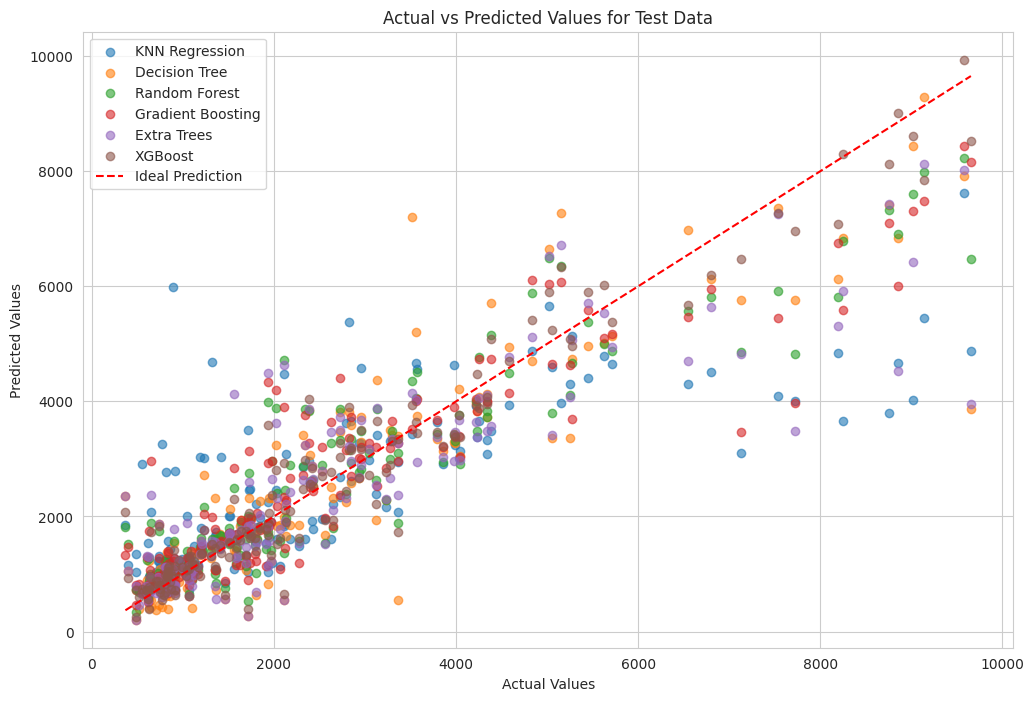


Test Data Performance Metrics:
               Model         MAE           MSE         RMSE        R²
5            XGBoost  354.192520  2.569247e+05   506.877402  0.942638
3  Gradient Boosting  558.406877  7.352040e+05   857.440349  0.835856
2      Random Forest  566.262521  6.632376e+05   814.393999  0.851923
1      Decision Tree  575.602381  8.321871e+05   912.242882  0.814203
4        Extra Trees  622.822214  1.071459e+06  1035.112924  0.760782
0     KNN Regression  864.959286  1.920608e+06  1385.859989  0.571198


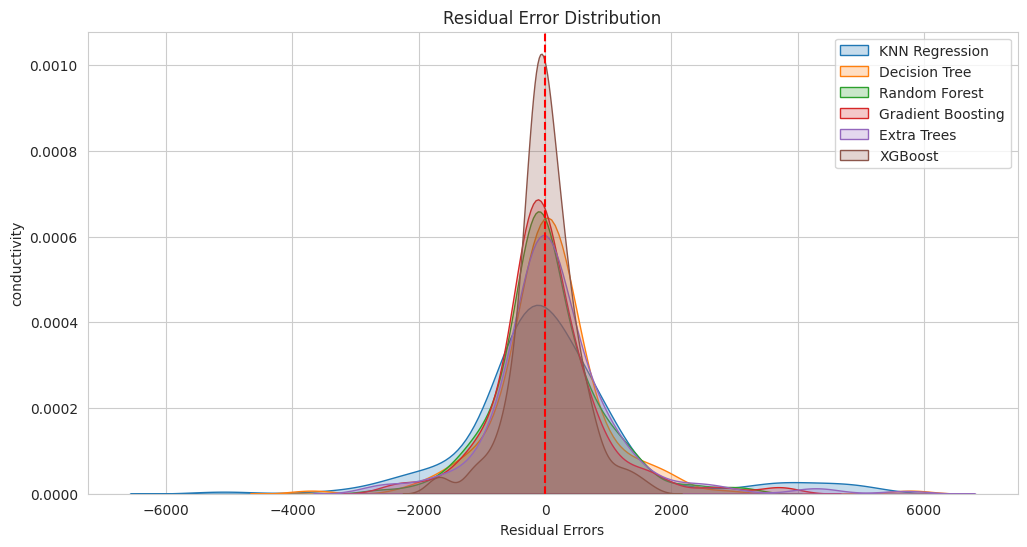

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to analyze test data predictions
def evaluate_models(models, X_test, y_test):
    results = []

    plt.figure(figsize=(12, 8))

    for name, model in models.items():
        y_pred = model.predict(X_test)

        # Compute Metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        results.append((name, mae, mse, rmse, r2))

        # Scatter plot of Actual vs Predicted
        plt.scatter(y_test, y_pred, alpha=0.6, label=name)

    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Ideal Prediction")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted Values for Test Data")
    plt.legend()
    plt.show()

    # Convert results to DataFrame and display
    df_results = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "RMSE", "R²"]).sort_values(by="MAE")
    print("\nTest Data Performance Metrics:")
    print(df_results)

    # Residual Errors Plot
    plt.figure(figsize=(12, 6))
    for name, model in models.items():
        y_pred = model.predict(X_test)
        residuals = y_test - y_pred
        sns.kdeplot(residuals, label=name, fill=True)

    plt.axvline(0, color='red', linestyle="--")
    plt.xlabel("Residual Errors")
    plt.ylabel("conductivity")
    plt.title("Residual Error Distribution")
    plt.legend()
    plt.show()

# Call the function to analyze test data
evaluate_models(models, X_test, y_test)

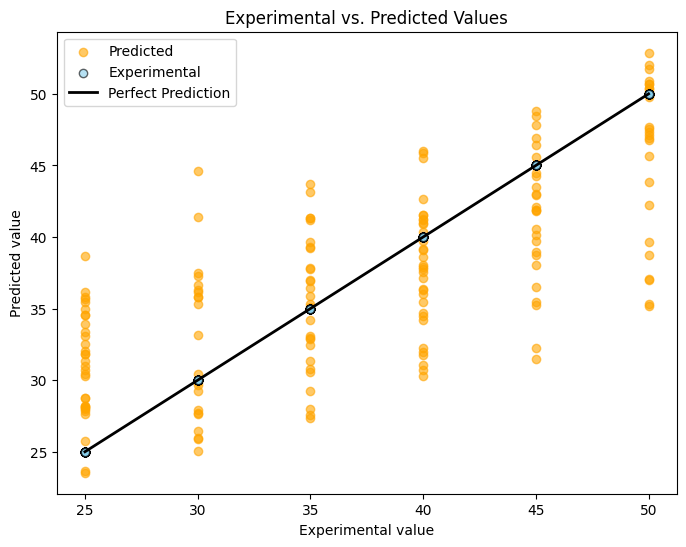

In [ ]:


# Plot actual vs. predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='orange', label='Predicted')
plt.scatter(y_test, y_test, alpha=0.6, color='skyblue', label='Experimental', edgecolors='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', lw=2, label='Perfect Prediction')
plt.xlabel('Experimental value')
plt.ylabel('Predicted value')
plt.title('Experimental vs. Predicted Values')
plt.legend()
plt.show()


Pearson Correlation with Conductivity:
 conductivity    1.000000
Temp            0.461730
SLogP           0.298394
nHBDonA         0.191349
nRot            0.129279
WPath           0.111297
nH              0.098569
HBDMF           0.096498
nRingA          0.060107
WPolA           0.043627
Zagreb2A        0.036081
Zagreb1A        0.027450
HBDMW           0.012831
nRotA          -0.012781
nAromAtomA     -0.015597
WPathA         -0.023092
Zagreb1        -0.039923
nAromAtom      -0.047289
nHA            -0.061262
SLogPA         -0.067261
Zagreb2        -0.070649
HBAMF          -0.088086
WPol           -0.092204
HBA MW         -0.113571
nRing          -0.291199
nHBDon         -0.326216
nSpiroA              NaN
nSpiro               NaN
Name: conductivity, dtype: float64

Spearman Correlation with Conductivity:
 conductivity    1.000000
Temp            0.512127
SLogP           0.405872
HBDMF           0.193124
nRot            0.143655
nHBDonA         0.099001
nH              0.024464
nRingA  

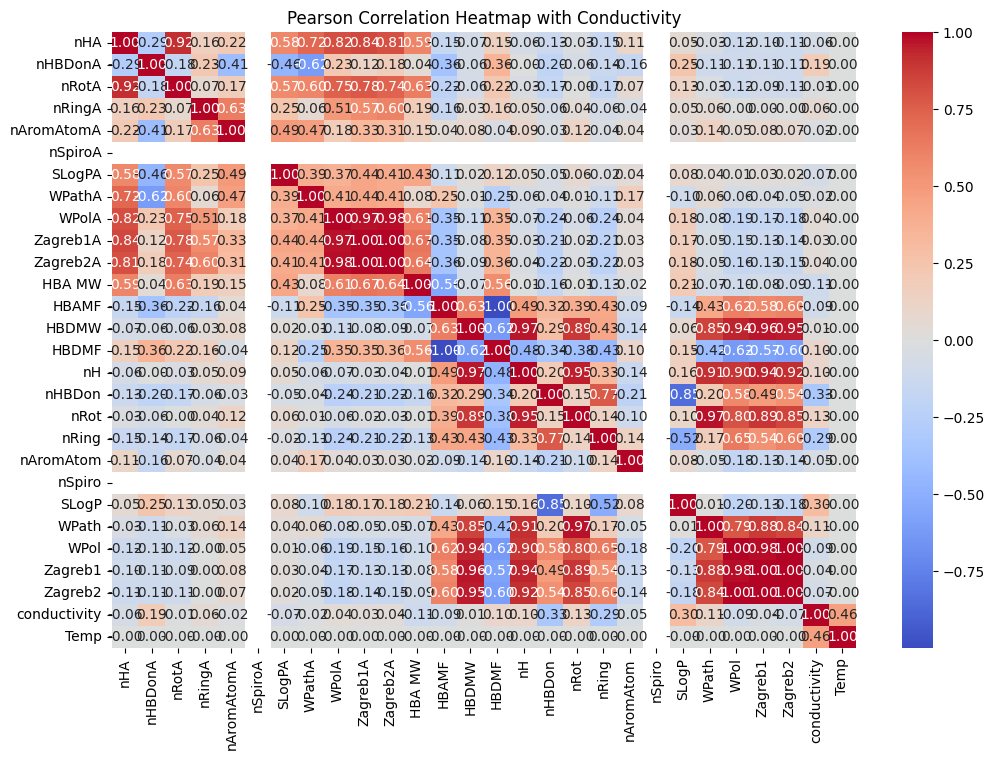

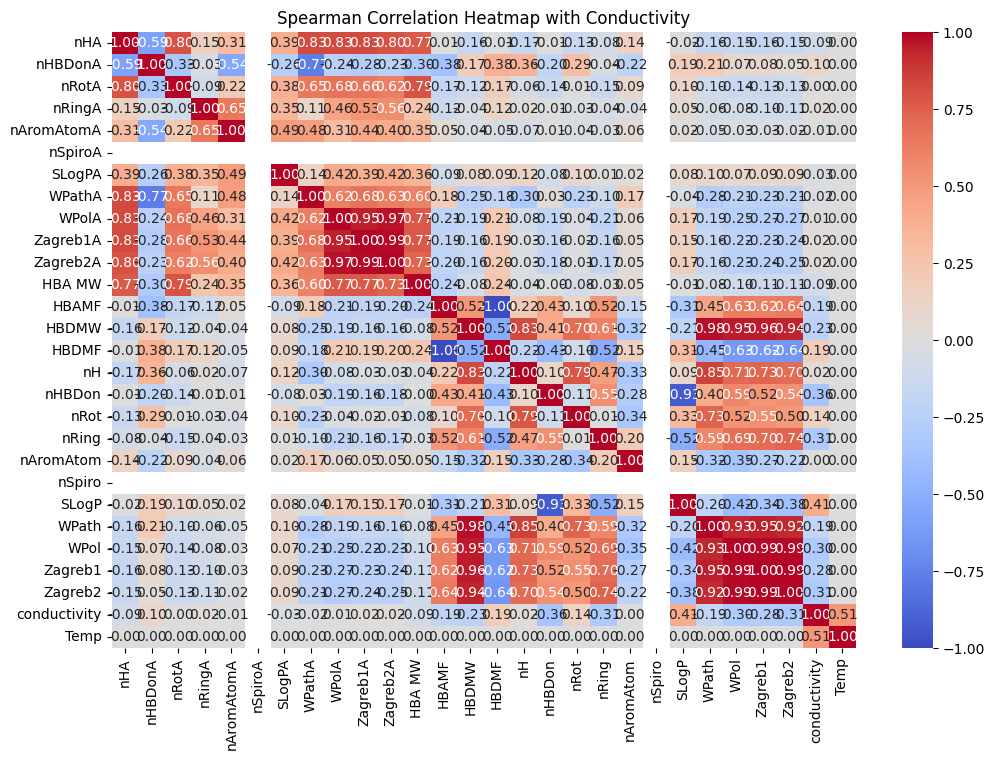

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/CONDUCTIVITY.csv"  # Update file path if needed
df = pd.read_csv(file_path)

# Ensure 'conductivity' is present in the dataset
if 'conductivity' not in df.columns:
    raise ValueError("The dataset must contain a column named 'conductivity'.")

# Compute Pearson and Spearman correlation with conductivity
pearson_corr = df.corr(method='pearson')['conductivity'].sort_values(ascending=False)
spearman_corr = df.corr(method='spearman')['conductivity'].sort_values(ascending=False)

# Print the top correlated features
print("Pearson Correlation with Conductivity:\n", pearson_corr)
print("\nSpearman Correlation with Conductivity:\n", spearman_corr)

# Plot correlation heatmap (Pearson)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(method='pearson'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Heatmap with Conductivity")
plt.show()

# Plot correlation heatmap (Spearman)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Heatmap with Conductivity")
plt.show()

In [ ]:
import pandas as pd

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

# Display all rows
pd.set_option("display.max_rows", None)  # Ensure all rows are printed
print(results_df)

     Actual    Predicted
695  2176.0  2092.495361
816  8754.0  8128.286133
30    635.0   952.943237
599  2842.0  3184.072754
96   1713.0   398.804932
244  1641.0  1752.754517
558  1213.0  1360.184448
352   742.0   811.033325
464  1203.0  1350.916504
543  3564.0  3634.500732
447  1522.0  1535.132812
254  2952.0  3165.451416
250  1414.0  1371.664062
65    961.0  1250.650024
668  4384.0  5088.255859
215  1466.0   631.558838
39    846.0  1137.846558
192  1067.0  1291.037964
86    487.0   253.197113
493   898.0  1408.925659
670  3567.0  3444.049561
196   546.0   737.430969
209   823.0   951.340942
212   650.0   741.366577
738  4341.0  4074.959229
275  1093.0  1316.394531
120  2954.0  3494.172119
292  2848.0  3149.440918
139   523.0   600.189514
291  8253.0  8294.654297
836  2433.0  2531.651855
63    842.0  1045.328613
618  1315.0  1526.535522
66    803.0   819.671631
533  2137.0  1894.881958
518  1694.0  1748.746094
334   753.0   809.291443
328  1123.0  1162.046143
239   835.0  1101.300781


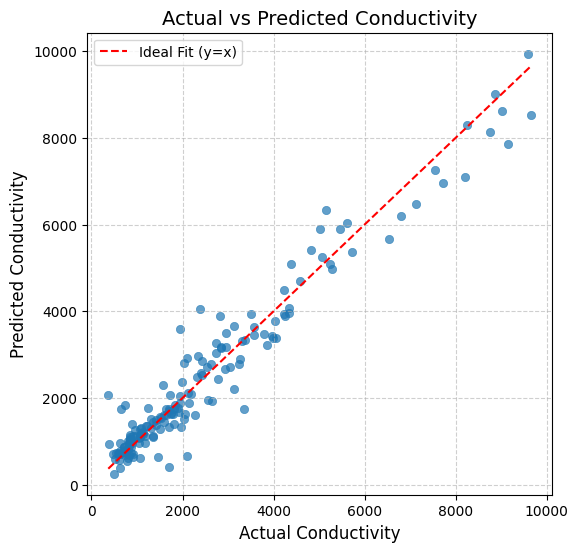

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scatter plot
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, edgecolor=None)

# Reference diagonal line (Perfect Predictions)
x_vals = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_vals, x_vals, color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels and title
plt.xlabel("Actual Conductivity", fontsize=12)
plt.ylabel("Predicted Conductivity", fontsize=12)
plt.title("Actual vs Predicted Conductivity", fontsize=14)

# Show legend and plot
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()